# Exercise 2

## Instructions 

1. Generate train and test data.
2. Define a class NN of one-hidden neural net. The __init__ function takes 3 parameters (inputsize, hiddensize, outputsize).

2. Define a list hidden_size = [2, ...., 33, ....128] with a step 5. Be sure that list contains 33, which corresponds to the case of interpolation threshold, i.e. the number of parameters equals to the number of training points.
3. 

for h in hidden_size:
    define model(inputsize, hiddensize, outputsize)
    for e in epochs:
        forward step: output = model(input)
        compute loss 
        backpropagate loss (use backward)
        
    get train loss (after training): train_out = model(input)
    train_loss = criterion(train_out, labels)
    get test_loss: test_out = model(input)
    test_loss = criterion(test_out, labels)
       
4. Plot saved list of train and test losses, x axis reveals each h, y axis is loss values.
     

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import multivariate_normal
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import csv
import torch
from torch.autograd import Variable
import torch.nn as nn
from sklearn import datasets
from sklearn.model_selection import train_test_split

np.random.seed(1234)

In [2]:
x_values = np.random.normal(size = 200)
x_vals = np.array(x_values, dtype=np.float32)
r = np.random.normal(0, 3, size = 200)

y_values = [3*i + 5 for i in x_values] + r
y_vals = np.array(y_values, dtype=np.float32)


In [3]:
x_train, x_test, y_train, y_test = (train_test_split(x_vals, y_vals, test_size=0.2))

In [4]:
x_train = (x_train).reshape(-1, 1)
x_test = (x_test).reshape(-1, 1)
y_train = (y_train).reshape(-1, 1)
y_test = (y_test).reshape(-1, 1)

In [5]:
x_vals.shape

(200,)

In [6]:
print(x_train.shape)
print(y_train.shape)

(160, 1)
(160, 1)


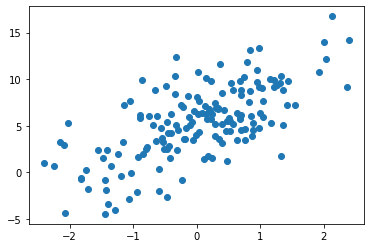

In [7]:
plt.scatter(x_train, y_train)

In [8]:
class NN(torch.nn.Module):
    def __init__(self, inputSize, hiddenSize, outputSize):
        super(NN, self).__init__()
        self.linear = nn.Sequential(torch.nn.Linear(inputSize, hiddenSize),
                                    torch.nn.ReLU(),
                                    torch.nn.Linear(hiddenSize, outputSize))
                                    

    def forward(self, x):
        out = self.linear(x)
        return out
    
    def add_units(self, n_new):
        # take a copy of the current weights stored in self.linear
        current_in = self.linear[0].weight.data
        current_out = self.linear[2].weight.data

        # randomly initialize a tensor with the size of the wanted layer 
        hl_input = torch.zeros([n_new, current_in.shape[1]])
        nn.init.xavier_uniform_(hl_input, gain=nn.init.calculate_gain('relu'))
        hl_out = torch.zeros([current_out.shape[0], n_new])
        nn.init.xavier_uniform_(hl_out, gain=nn.init.calculate_gain('relu'))

        # concatenate the old weights with the new weights
        new_wi_in = torch.cat([current_in, hl_input], dim=0)
        new_wi_out = torch.cat([current_out, hl_out], dim=1)

        # reset weight and grad variables to new size
        linear_in = nn.Linear(current_in.shape[1], current_in.shape[0] + n_new)
        linear_out = nn.Linear(current_out.shape[1] + n_new, current_out.shape[0])

        # set the weight data to new values
        linear_in.weight = torch.nn.Parameter(new_wi_in)
        linear_out.weight = torch.nn.Parameter(new_wi_out)
        self.linear = nn.Sequential(linear_in,
                                    torch.nn.ReLU(),
                                    linear_out)

In [17]:
inputDim = 1
hidden_sizes = 100
outputDim = 1      
learningRate = 0.001 
epochs = 500

In [18]:
criterion = torch.nn.MSELoss() 

In [19]:
#!!! Note that training in the code below done outside of epoch loop.
hs = []
train_losses = []
test_losses = []
for h in range(2, hidden_sizes, 1):
    hs.append(h)
    # add you code here
    optimizer = torch.optim.SGD(model.parameters(), lr=learningRate, momentum=0.95)
    for epoch in range(epochs):
        if torch.cuda.is_available():
            inputs_train = Variable(torch.from_numpy(x_train).cuda())
            labels_train = Variable(torch.from_numpy(y_train).cuda())
        else:
            inputs_train = Variable(torch.from_numpy(x_train))
            labels_train = Variable(torch.from_numpy(y_train))
        if torch.cuda.is_available():
            inputs_test = Variable(torch.from_numpy(x_test).cuda())
            labels_test = Variable(torch.from_numpy(y_test).cuda())
        else:
            inputs_test = Variable(torch.from_numpy(x_test))
            labels_test = Variable(torch.from_numpy(y_test))
        optimizer.zero_grad()
#         print(inputs_train.shape)
        outputs = model(inputs_train)
        loss = criterion(outputs, labels_train)
        loss.backward()
        optimizer.step()
        if epoch % 50 == 0:
            print('h: {} | epoch: {}, loss: {}'.format(h, epoch, loss.item()))  
    outputs_train = model(inputs_train)
    train_loss = criterion(outputs_train, labels_train)
    train_losses.append(train_loss)
    outputs_test = model(inputs_test)
    test_loss = criterion(outputs_test, labels_test)
    test_losses.append(test_loss)

h: 2 | epoch: 0, loss: 47.67487335205078
h: 2 | epoch: 50, loss: 9.393946647644043
h: 2 | epoch: 100, loss: 9.017313003540039
h: 2 | epoch: 150, loss: 8.733830451965332
h: 2 | epoch: 200, loss: 8.563591957092285
h: 2 | epoch: 250, loss: 8.479537963867188
h: 2 | epoch: 300, loss: 8.44423770904541
h: 2 | epoch: 350, loss: 8.430394172668457
h: 2 | epoch: 400, loss: 8.423993110656738
h: 2 | epoch: 450, loss: 8.419755935668945
h: 3 | epoch: 0, loss: 29.162029266357422
h: 3 | epoch: 50, loss: 9.639165878295898
h: 3 | epoch: 100, loss: 8.591532707214355
h: 3 | epoch: 150, loss: 8.471349716186523
h: 3 | epoch: 200, loss: 8.445283889770508
h: 3 | epoch: 250, loss: 8.430115699768066
h: 3 | epoch: 300, loss: 8.426968574523926
h: 3 | epoch: 350, loss: 8.425776481628418
h: 3 | epoch: 400, loss: 8.425183296203613
h: 3 | epoch: 450, loss: 8.424753189086914
h: 4 | epoch: 0, loss: 15.964543342590332
h: 4 | epoch: 50, loss: 8.72138786315918
h: 4 | epoch: 100, loss: 8.446462631225586
h: 4 | epoch: 150, l

h: 21 | epoch: 150, loss: 8.179315567016602
h: 21 | epoch: 200, loss: 8.161489486694336
h: 21 | epoch: 250, loss: 8.1502046585083
h: 21 | epoch: 300, loss: 8.142829895019531
h: 21 | epoch: 350, loss: 8.13658618927002
h: 21 | epoch: 400, loss: 8.130434036254883
h: 21 | epoch: 450, loss: 8.124181747436523
h: 22 | epoch: 0, loss: 9.854362487792969
h: 22 | epoch: 50, loss: 8.41090202331543
h: 22 | epoch: 100, loss: 8.248167991638184
h: 22 | epoch: 150, loss: 8.210551261901855
h: 22 | epoch: 200, loss: 8.19575309753418
h: 22 | epoch: 250, loss: 8.181706428527832
h: 22 | epoch: 300, loss: 8.167757987976074
h: 22 | epoch: 350, loss: 8.158246994018555
h: 22 | epoch: 400, loss: 8.149558067321777
h: 22 | epoch: 450, loss: 8.13897705078125
h: 23 | epoch: 0, loss: 16.280969619750977
h: 23 | epoch: 50, loss: 8.405189514160156
h: 23 | epoch: 100, loss: 8.220242500305176
h: 23 | epoch: 150, loss: 8.170635223388672
h: 23 | epoch: 200, loss: 8.149304389953613
h: 23 | epoch: 250, loss: 8.134183883666992

h: 40 | epoch: 200, loss: 8.00684928894043
h: 40 | epoch: 250, loss: 7.995569705963135
h: 40 | epoch: 300, loss: 7.99044942855835
h: 40 | epoch: 350, loss: 7.986547946929932
h: 40 | epoch: 400, loss: 7.9831342697143555
h: 40 | epoch: 450, loss: 7.980193138122559
h: 41 | epoch: 0, loss: 14.168100357055664
h: 41 | epoch: 50, loss: 8.372745513916016
h: 41 | epoch: 100, loss: 8.03323745727539
h: 41 | epoch: 150, loss: 8.010296821594238
h: 41 | epoch: 200, loss: 7.990410804748535
h: 41 | epoch: 250, loss: 7.978704929351807
h: 41 | epoch: 300, loss: 7.967276096343994
h: 41 | epoch: 350, loss: 7.957775115966797
h: 41 | epoch: 400, loss: 7.948848724365234
h: 41 | epoch: 450, loss: 7.940698146820068
h: 42 | epoch: 0, loss: 11.99463939666748
h: 42 | epoch: 50, loss: 8.12951946258545
h: 42 | epoch: 100, loss: 8.022982597351074
h: 42 | epoch: 150, loss: 7.981371879577637
h: 42 | epoch: 200, loss: 7.965169429779053
h: 42 | epoch: 250, loss: 7.95673131942749
h: 42 | epoch: 300, loss: 7.9505777359008

h: 59 | epoch: 300, loss: 7.921355247497559
h: 59 | epoch: 350, loss: 7.913289546966553
h: 59 | epoch: 400, loss: 7.905726432800293
h: 59 | epoch: 450, loss: 7.8986921310424805
h: 60 | epoch: 0, loss: 27.652450561523438
h: 60 | epoch: 50, loss: 8.668319702148438
h: 60 | epoch: 100, loss: 7.9931440353393555
h: 60 | epoch: 150, loss: 7.936134338378906
h: 60 | epoch: 200, loss: 7.9172234535217285
h: 60 | epoch: 250, loss: 7.90313196182251
h: 60 | epoch: 300, loss: 7.8907928466796875
h: 60 | epoch: 350, loss: 7.879860877990723
h: 60 | epoch: 400, loss: 7.8709845542907715
h: 60 | epoch: 450, loss: 7.86257791519165
h: 61 | epoch: 0, loss: 48.07130813598633
h: 61 | epoch: 50, loss: 9.035964012145996
h: 61 | epoch: 100, loss: 8.292634963989258
h: 61 | epoch: 150, loss: 8.082125663757324
h: 61 | epoch: 200, loss: 8.045808792114258
h: 61 | epoch: 250, loss: 8.01720142364502
h: 61 | epoch: 300, loss: 7.997748374938965
h: 61 | epoch: 350, loss: 7.973934173583984
h: 61 | epoch: 400, loss: 7.9592561

h: 79 | epoch: 0, loss: 18.112186431884766
h: 79 | epoch: 50, loss: 8.833653450012207
h: 79 | epoch: 100, loss: 8.012788772583008
h: 79 | epoch: 150, loss: 7.929678440093994
h: 79 | epoch: 200, loss: 7.904480934143066
h: 79 | epoch: 250, loss: 7.883286952972412
h: 79 | epoch: 300, loss: 7.869032382965088
h: 79 | epoch: 350, loss: 7.857907772064209
h: 79 | epoch: 400, loss: 7.847196102142334
h: 79 | epoch: 450, loss: 7.837927341461182
h: 80 | epoch: 0, loss: 23.544025421142578
h: 80 | epoch: 50, loss: 8.62942886352539
h: 80 | epoch: 100, loss: 7.995048522949219
h: 80 | epoch: 150, loss: 7.916293144226074
h: 80 | epoch: 200, loss: 7.891786098480225
h: 80 | epoch: 250, loss: 7.8754167556762695
h: 80 | epoch: 300, loss: 7.859733581542969
h: 80 | epoch: 350, loss: 7.849005222320557
h: 80 | epoch: 400, loss: 7.8380866050720215
h: 80 | epoch: 450, loss: 7.830410957336426
h: 81 | epoch: 0, loss: 15.860555648803711
h: 81 | epoch: 50, loss: 8.42615795135498
h: 81 | epoch: 100, loss: 7.9377007484

h: 98 | epoch: 350, loss: 7.825004577636719
h: 98 | epoch: 400, loss: 7.812310218811035
h: 98 | epoch: 450, loss: 7.800492763519287
h: 99 | epoch: 0, loss: 15.453126907348633
h: 99 | epoch: 50, loss: 8.458036422729492
h: 99 | epoch: 100, loss: 7.870614051818848
h: 99 | epoch: 150, loss: 7.796466827392578
h: 99 | epoch: 200, loss: 7.7635650634765625
h: 99 | epoch: 250, loss: 7.745486259460449
h: 99 | epoch: 300, loss: 7.7313642501831055
h: 99 | epoch: 350, loss: 7.721656799316406
h: 99 | epoch: 400, loss: 7.712985038757324
h: 99 | epoch: 450, loss: 7.7046003341674805


In [20]:
model.linear[0].weight.shape

torch.Size([99, 1])

In [21]:
with torch.no_grad(): 
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
#     print(predicted)

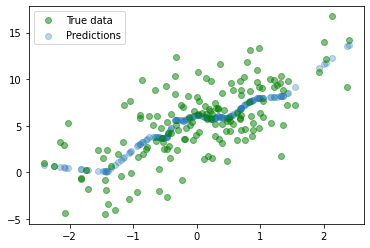

In [22]:
plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.scatter(x_train, predicted, label='Predictions', alpha=0.3)
plt.legend(loc='best')
plt.show()

### Interpolation threshold.
Plot the interpolation threshold (n=p) as a vertical line.
The number of parameters is $p = (d+1)*H + (H+1)*K$, where H is a number of neurons in a hidden layer;
d is a dimension of input and K is a dimension of output (K=1 in the case of regression).
The X-axis on the plot below reveals the size of H.
1. What will be the value of H for the case n=p?
2. Plot the interpolation threshold. Does it correspond to a test loss pick?

(0.0, 100.0)

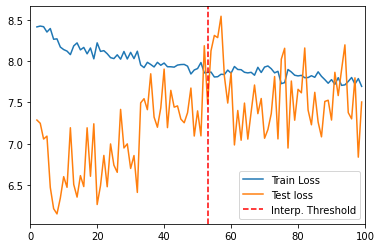

In [23]:
plt.plot(hs, train_losses, label='Train Loss')
plt.plot(hs, test_losses, label='Test loss')
plt.axvline(53, color = 'r', linestyle = '--', label = 'Interp. Threshold')
plt.legend(loc='best')
plt.xlim(0, 100)

(0.0, 100.0)

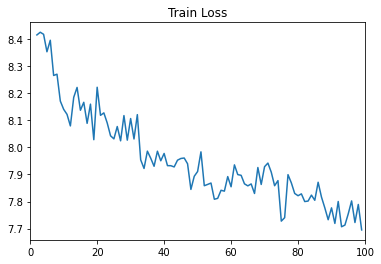

In [24]:
plt.plot(hs, train_losses)
plt.title('Train Loss')
plt.xlim(0, 100)

(0.0, 100.0)

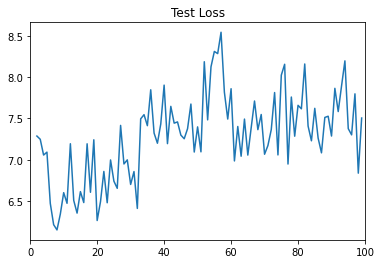

In [25]:
plt.plot(hs, test_losses)
plt.title('Test Loss')
plt.xlim(0, 100)